In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://api.cartolafc.globo.com/atletas/mercado'
response = requests.get(url)
data = response.json()

In [ ]:
data

{'clubes': {'1371': {'id': 1371,
   'nome': 'Cuiabá',
   'abreviacao': 'CUI',
   'escudos': {'60x60': 'https://s.sde.globo.com/media/organizations/2014/04/16/cuiaba65.png',
    '45x45': 'https://s.sde.globo.com/media/organizations/2014/04/16/cuiaba45.png',
    '30x30': 'https://s.sde.globo.com/media/organizations/2014/04/16/cuiaba30_.png'},
   'nome_fantasia': 'Cuiabá'},
  '262': {'id': 262,
   'nome': 'Flamengo',
   'abreviacao': 'FLA',
   'escudos': {'60x60': 'https://s.sde.globo.com/media/organizations/2018/04/09/Flamengo-65.png',
    '45x45': 'https://s.sde.globo.com/media/organizations/2018/04/09/Flamengo-45.png',
    '30x30': 'https://s.sde.globo.com/media/organizations/2018/04/09/Flamengo-30.png'},
   'nome_fantasia': 'Flamengo'},
  '263': {'id': 263,
   'nome': 'Botafogo',
   'abreviacao': 'BOT',
   'escudos': {'60x60': 'https://s.sde.globo.com/media/organizations/2019/02/04/botafogo-65.png',
    '45x45': 'https://s.sde.globo.com/media/organizations/2019/02/04/botafogo-45.png',

In [ ]:
atletas = pd.DataFrame(data['atletas'])
clubes = pd.DataFrame(data['clubes'])
posicoes = pd.DataFrame(data['posicoes'])
status = pd.DataFrame(data['status'])

In [ ]:
atletas.columns

Index(['scout', 'atleta_id', 'rodada_id', 'clube_id', 'posicao_id',
       'status_id', 'pontos_num', 'preco_num', 'variacao_num', 'media_num',
       'jogos_num', 'minimo_para_valorizar', 'gato_mestre', 'slug', 'apelido',
       'apelido_abreviado', 'nome', 'foto'],
      dtype='object')

In [ ]:
clubes = clubes.T.set_index('id').reset_index()
posicoes = posicoes.T.set_index('id').reset_index()
status = status.T.set_index('id').reset_index()

In [ ]:
atletas[:2]

,scout,atleta_id,rodada_id,clube_id,posicao_id,status_id,pontos_num,preco_num,variacao_num,media_num,jogos_num,minimo_para_valorizar,gato_mestre,slug,apelido,apelido_abreviado,nome,foto
0,"{'CA': 1, 'DS': 2, 'FC': 2, 'FS': 1, 'I': 2}",98225,1,267,5,7,0,3.94,-1.06,1.1,1,2.39,"{'media_pontos_mandante': None, 'media_pontos_...",pedro-raul,Pedro Raul,P. Raul,Pedro Raul Garay da Silva,https://s.sde.globo.com/media/person_role/2023...
1,{},71844,1,356,5,5,0,7.10,-3.90,0.0,1,5.54,"{'media_pontos_mandante': None, 'media_pontos_...",thiago-galhardo,Thiago Galhardo,T. Galhardo,Thiago Galhardo do Nascimento Rocha,https://s.sde.globo.com/media/person_role/2022...


In [ ]:
atletas = atletas[['atleta_id','clube_id', 'posicao_id',	'status_id','nome', 'slug', 'apelido', 'foto', 'preco_num', 'pontos_num', 'variacao_num', 'media_num', 'jogos_num']]

atletas = atletas.merge(clubes.rename(columns={'id_clube': 'nome_clube', 'nome': 'nome_clube', 'nome_fantasia': 'nome_fantasia_clube'}), left_on='clube_id', right_on='id')
atletas = atletas.merge(posicoes.rename(columns={'id': 'id_posicao', 'nome': 'nome_posicao', 'abreviacao': 'abreviacao_posicao'}), left_on='posicao_id', right_on='id_posicao')
atletas = atletas.merge(status.rename(columns={'id': 'id_status', 'nome': 'nome_status'}), left_on='status_id', right_on='id_status')

In [ ]:
atletas = atletas[['nome', 'slug', 'apelido', 'foto', 'preco_num', 'pontos_num', 'variacao_num', 'media_num', 'jogos_num', 'nome_posicao', 'nome_clube', 'nome_status']]

In [ ]:
atletas = atletas.dropna()

In [ ]:
times = atletas.groupby('nome_clube').agg({'nome': 'count', 'preco_num': 'sum', 'pontos_num': 'sum'}).reset_index()
times = times.rename(columns={'nome': 'jogadores_num'})
times['preco_medio'] = times['preco_num'] / times['jogadores_num']
times = times.sort_values('pontos_num', ascending=False).reset_index(drop=True)
times['posicao'] = times.index + 1

In [ ]:
preco_medio = atletas.groupby('nome_clube')['preco_num'].mean().reset_index()
print(preco_medio)

       nome_clube  preco_num
0      América-MG   4.543333
1    Athlético-PR   5.802500
2     Atlético-MG   5.839143
3           Bahia   4.763889
4        Botafogo   5.246842
5      Bragantino   4.690500
6     Corinthians   5.887187
7        Coritiba   3.672105
8        Cruzeiro   4.509032
9          Cuiabá   3.884194
10       Flamengo   7.310000
11     Fluminense   7.444242
12      Fortaleza   5.513636
13          Goiás   3.200526
14         Grêmio   6.089167
15  Internacional   5.853226
16      Palmeiras   6.840286
17         Santos   5.216176
18      São Paulo   5.711892
19          Vasco   4.657568


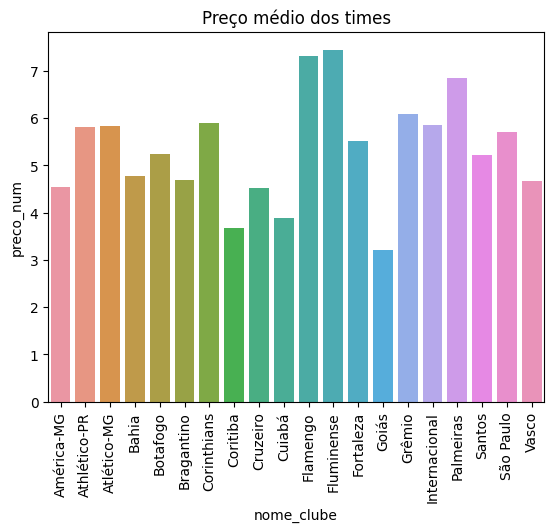

In [ ]:
sns.barplot(x='nome_clube', y='preco_num', data=preco_medio)
plt.xticks(rotation=90)
plt.title('Preço médio dos times')
plt.show()

In [ ]:
machucados = atletas[atletas['status_id'] == 5]
suspensos = atletas[atletas['status_id'] == 6]
livres = atletas[atletas['status_id'] == 7]

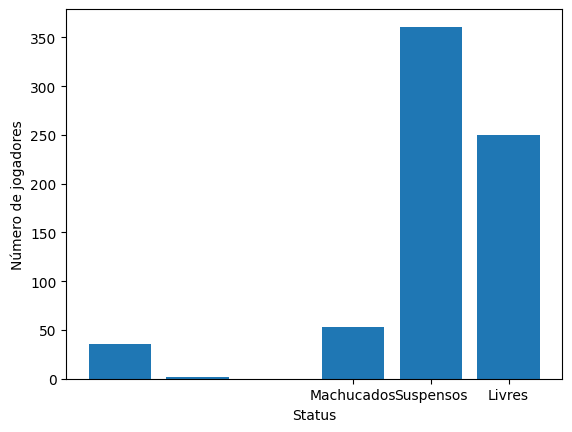

In [ ]:
status_counts = atletas['status_id'].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.xticks([5, 6, 7], ['Machucados', 'Suspensos', 'Livres'])
plt.xlabel('Status')
plt.ylabel('Número de jogadores')
plt.show()